# Anomaly Screening Applying Pseudo-wells (ASAP)

Stavanger Machine Learning Hackathon 18-19 September, 2018.

Project page: <https://events.agilescientific.com/project/asap>

## Seismic data loading and processing

This notebook shows how to:

* (...)

## To-do

* (...)

In [1]:
import segyio
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
%config InlineBackend.figure_format = 'retina'

In [2]:
import segypy

# Set verbose level
segypy.verbose=1;

filename='./data/3d_nearstack.sgy';

# Get only SegyHeader
SH = segypy.getSegyHeader(filename);

In [ ]:
inl=np.arange(1300,1502,2)
crl=np.arange(1500,2002,2)
hrz=np.recfromtxt('./data/Top_Heimdal_subset.txt', names=['il','xl','z'])

filename='./data/3d_nearstack.sgy'
#f=open(filename, 'rb')
seis,header,trace_headers=segypy.readSegy(filename)
near=seis.reshape(header['ns'],inl.size,crl.size)

lagtime=trace_headers['LagTimeA'][0]*-1
twt=np.arange(lagtime,header['dt']/1e3*header['ns']+lagtime,header['dt']/1e3)

In [ ]:
from scipy.interpolate import interp2d
horizon = np.zeros((len(inl), len(crl)))
print(horizon.shape)
for i, idx in enumerate(inl):
    for j, xdx in enumerate(crl):
        time = hrz['z'][np.where((hrz['il']== idx) & (hrz['xl'] == xdx))]
        if len(time) == 1:
            horizon[i, j] = time 
            

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(horizon, vmin=2030, vmax=2200)
print(horizon)
print(horizon[:, 0])

In [ ]:
points = []
wanted = []
for i in range(horizon.shape[0]):
    for j in range(horizon.shape[1]):
        if horizon[i, j] != 0.:
            points.append([i, j, horizon[i, j]])
        else:
            wanted.append([i, j])
points = np.array(points)
print(points.shape)

In [ ]:
zs2 = scipy.interpolate.griddata(points[:, 0:2], points[:, 2], wanted, method="cubic")

In [ ]:
for p, val in zip(wanted, zs2):
    horizon[p[0], p[1]] = val

NameError: name 'horizon' is not defined

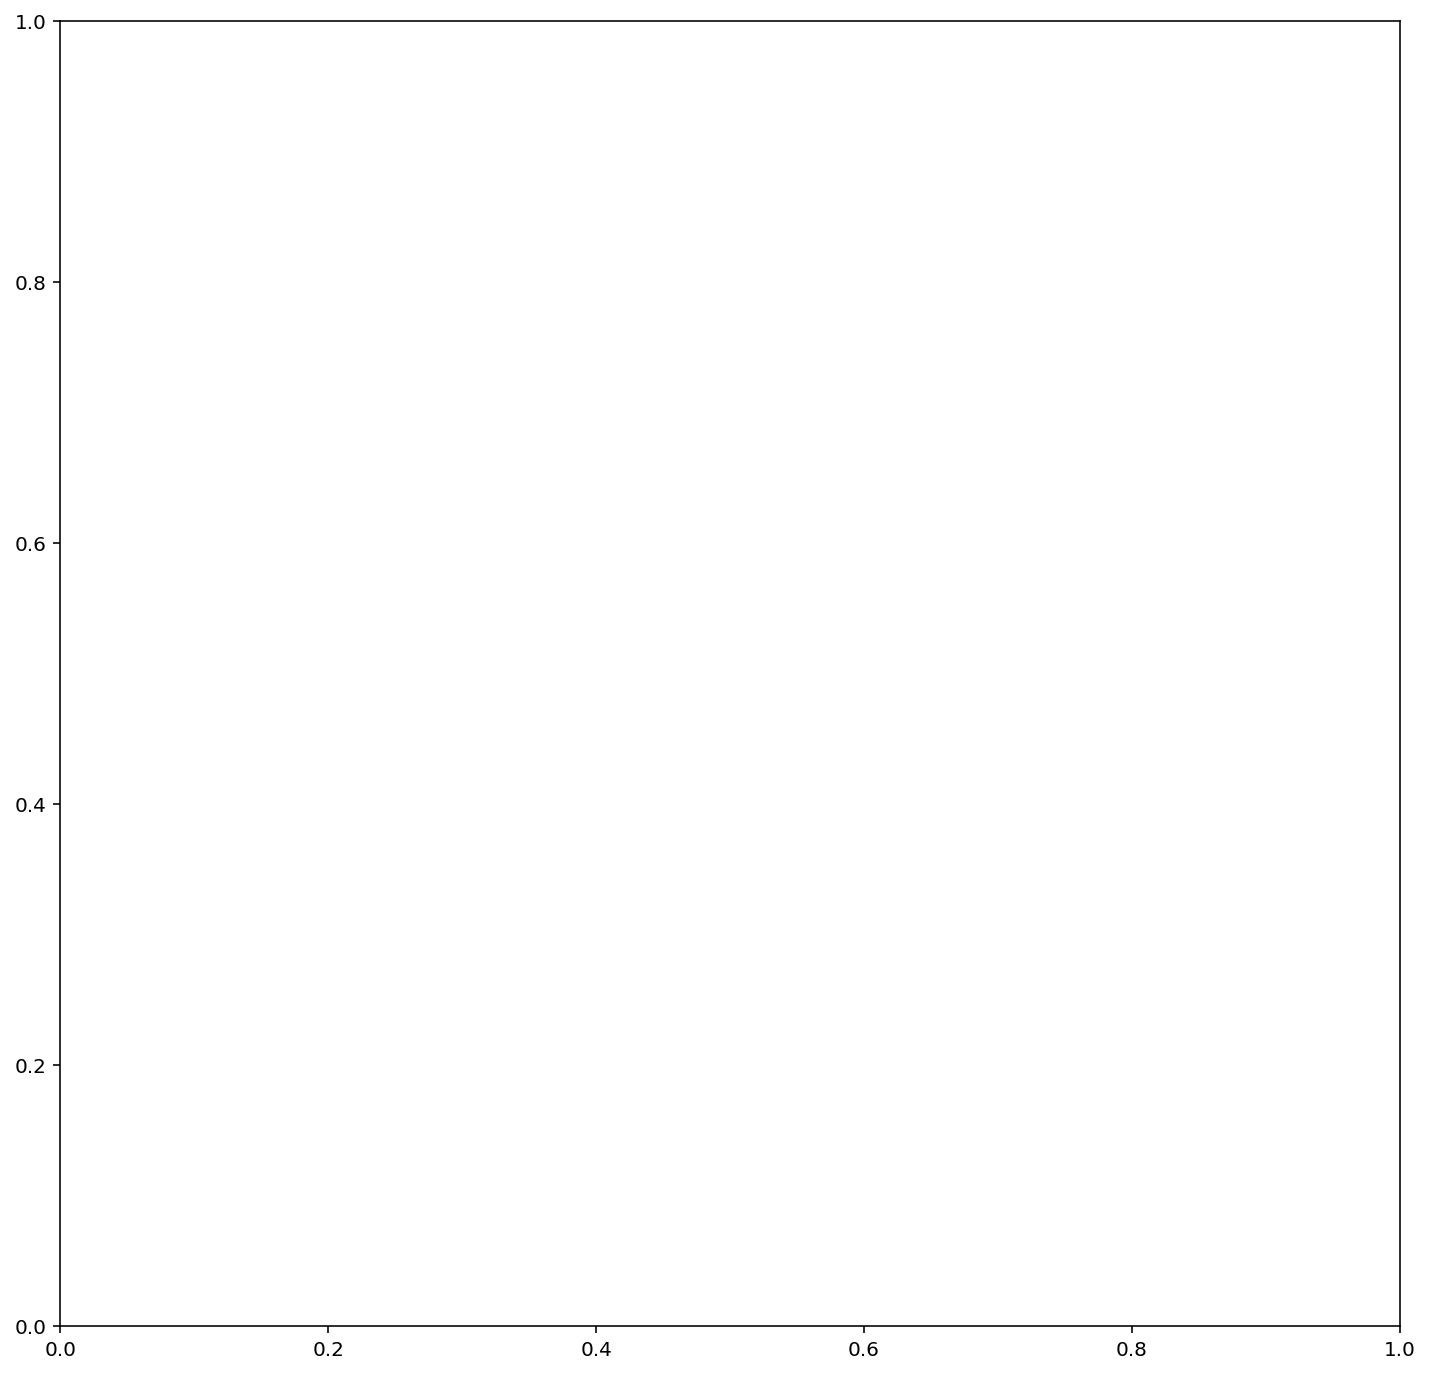

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(horizon, vmin=2030, vmax=2200)
print(horizon)
print(horizon[:, 0])

In [ ]:
N = 38
M = 0
hrz_idx = [np.abs(twt-val).argmin() for val in horizon[N, :]]
print(hrz_idx)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
top_add, below_add = 12, 50
amplitude = near[hrz_idx[M]-top_add:hrz_idx[M]+below_add, N, M]
ax.plot(amplitude, range(len(amplitude)))
ax.axhline(top_add)
ax.set_ylim(below_add+top_add, 0)

In [ ]:
h_bin = np.zeros((250, near[:, N].shape[1]))
print(h_bin.shape)
for i, val in enumerate(hrz_idx):
    h_bin[val, i] = 1
print(near.shape)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
clip = abs(np.percentile(seis, 0.8))
ax.imshow(near[:, N], cmap="Greys", vmin=-clip, vmax=clip)
#ax.imshow(h_bin, alpha=0.2)
ax.plot(range(len(hrz_idx)), hrz_idx, linewidth=5, color="black")
ax.axvline(276//2, color="red", linewidth=5)

In [ ]:
top_add, below_add = 12, 52
traces = np.zeros((horizon.shape[0], horizon.shape[1], top_add+below_add))
for i in range(horizon.shape[0]):
    hrz_idx = [np.abs(twt-val).argmin() for val in horizon[i, :]]
    for j in range(horizon.shape[1]):
        amplitude = near[hrz_idx[j]-top_add:hrz_idx[j]+below_add, i, j]
        traces[i, j, :] = amplitude

In [ ]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 12))
axarr[0].imshow(traces[0].T)
axarr[1].imshow(traces[:, 0].T)

We first read in well data from Per Avseth's [open dataset distributed with the first edition of QSI (Quantitative Seismic Interpretation)](https://srb.stanford.edu/quantitative-seismic-interpretation).

Well 2 corresponds to the Glitne well 15/5-5 drilled in 1995. Well 5 is 15/5-6 (1997) and well 3 is 15/5-3. For all the informations related to these wells check [NPD's Factpages](http://factpages.npd.no/factpages/).